In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [62]:
df = pd.read_csv('edlich-kmeans-A0.csv') # import data

In [63]:
# get data from dataframe
f1 = df['V1'].values
f2 = df['V2'].values
f3 = df['V3'].values

In [64]:
# create array to work on
X = np.array(list(zip(f1,f2,f3)))

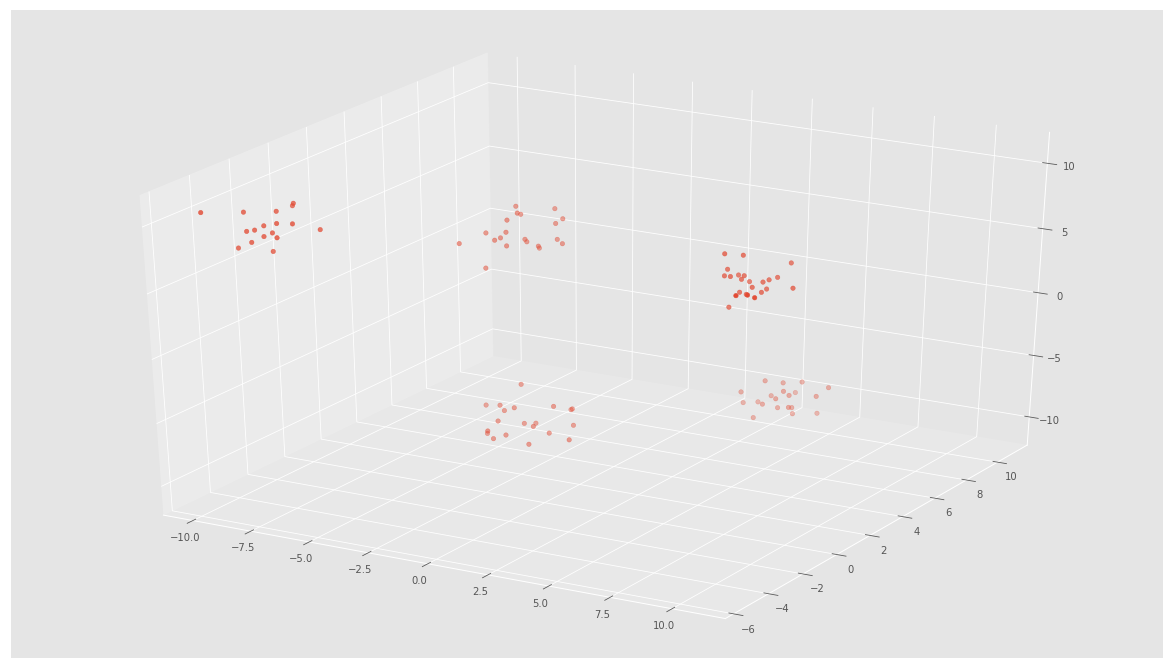

In [65]:
# plot given data in 3-dimensional system
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(f1,f2,f3)

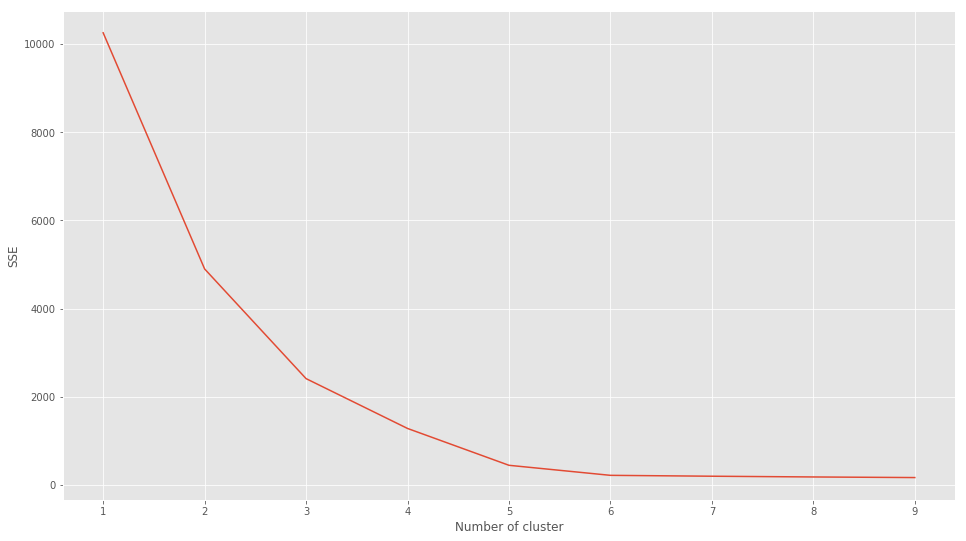

In [66]:
# finding best k
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [67]:
# 'elbow' at k = 5 so let k = 5 (also fits the clear clusters in the plot of the data above)

In [68]:
# k = 5
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

# find the cluster centers
C = kmeans.cluster_centers_
C

array([[ 6.47155208,  2.70446035,  5.19967608],
       [ 3.66536804,  8.91074968, -9.06579829],
       [-5.10691526,  5.60179825,  3.71956936],
       [-8.53242046, -3.55401526,  8.96857685],
       [-2.40331671,  2.14752865, -8.02378894]])

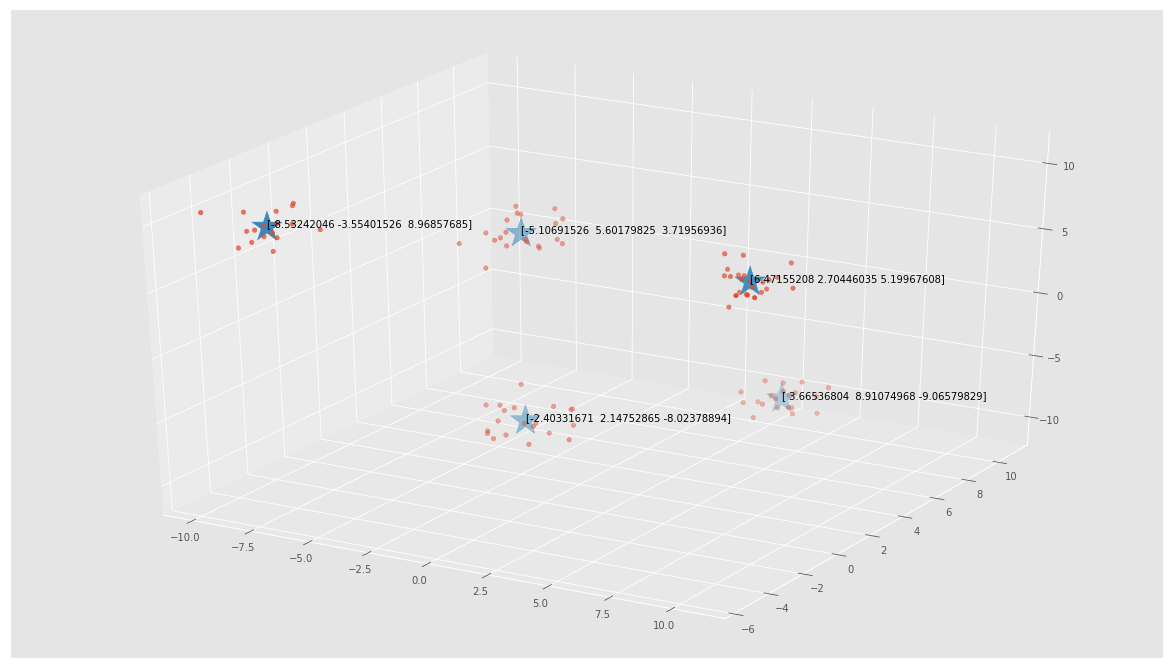

In [82]:
# plot including centers of clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(f1,f2,f3)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', s=1000) # plot stars and adjust size
for i in range(len(C)):
    ax.text(C[i,0],C[i,1],C[i,2], '%s' % (str(C[i])), size=10, zorder=1)